In [175]:
import spotipy # install if needed
from spotipy.oauth2 import SpotifyClientCredentials

import getpass

import pandas as pd

import random

from tqdm.notebook import tqdm

from bs4 import BeautifulSoup
import requests

import pprint

In [176]:
client_id=str(getpass.getpass('client_id?'))
client_secret=str(getpass.getpass('client_secret?'))

client_id?········
client_secret?········


### First prototype

In [177]:
url = "https://www.billboard.com/charts/hot-100"
response = requests.get(url)
response.status_code

soup=BeautifulSoup(response.content, 'html.parser')

artist=[]
song=[]
rank=[]

len_songs=len(soup.select('span.chart-element__information__song'))

for i in tqdm(range(len_songs)):
    song.append(soup.select('span.chart-element__information__song')[i].text)
    artist.append(soup.select('span.chart-element__information__artist')[i].text)
    
top100=pd.DataFrame({'song':song, 'artist':artist})

top100["artist"] = top100["artist"].apply(lambda x: x.lower())
top100["song"] = top100["song"].apply(lambda x: x.lower())

def song_recommendation():
    u_song = input("Which song do you really like?").lower
    if u_song in top100.song.values:
        print("Oh! It's a Top 100! We recommend you :", random.choice(top100['song']))
    else:
        print("I'm sorry, we have no song recommendation for you")

  0%|          | 0/100 [00:00<?, ?it/s]

In [123]:
song_recommendation()


Which song do you really like?kiss me more
I'm sorry, we have no song recommendation for you


In [93]:
top100

,song,artist
0,butter,bts
1,good 4 u,olivia rodrigo
2,levitating,dua lipa featuring dababy
3,kiss me more,doja cat featuring sza
4,montero (call me by your name),lil nas x
...,...,...
95,all i know so far,p!nk
96,what's next,drake
97,enough for you,olivia rodrigo
98,juggernaut,"tyler, the creator featuring lil uzi vert & ph..."


### 2d Phase - The Beatles Selector

In [178]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,client_secret=client_secret))

#Playlist identifier = https://open.spotify.com/playlist/62KSvzietSwXHw1beZdyHx?si=13f8c38f67174b8b

playlist = sp.user_playlist_tracks("pedropabloerr", "62KSvzietSwXHw1beZdyHx")

playlist['items'][0]['track']['id']


def get_playlist_tracks(user_id,playlist_id):
    results = sp.user_playlist_tracks(user_id,playlist_id)
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks
    
def get_ids_from_tracks(track_list):
    track_ids=[]
    for track in track_list:
        track_ids.append(track['track']['id'])
    return track_ids


def get_name_from_tracks(track_list):
    track_name=[]
    for track in track_list:
        track_name.append(track['track']['name'])
    return track_name



In [179]:
full_info=get_playlist_tracks("pedropabloerr", "62KSvzietSwXHw1beZdyHx")

In [180]:
beatles_track_ids=get_ids_from_tracks(full_info)
beatles_track_ids_1=beatles_track_ids[:99]
beatles_track_ids_2=beatles_track_ids[99:]

In [181]:
beatles_af_1=audio_feat_reg=sp.audio_features(tracks=beatles_track_ids_1)
beatles_af_2=audio_feat_reg=sp.audio_features(tracks=beatles_track_ids_2)

In [182]:
beatles_af=beatles_af_1+beatles_af_2

In [183]:
beatles_af_df1=pd.DataFrame(sp.audio_features(tracks=beatles_track_ids_1))
beatles_af_df2=pd.DataFrame(sp.audio_features(tracks=beatles_track_ids_2))

In [184]:
beatles_af_df=pd.concat([beatles_af_df1,beatles_af_df2])

In [185]:
beatles_track_names=get_name_from_tracks(full_info)

In [186]:
song = []
for i in beatles_track_names:
    song.append(i.split("-")[0])

In [187]:
beatles_af_df['song_name']=song

In [188]:
beatles_af_df["song_name"] = beatles_af_df["song_name"].apply(lambda x: x.lower())

In [189]:
artist_name=[]
artist_name += 193 * ["the beatles"]

In [190]:
beatles_af_df['artist']=artist_name

In [191]:
beatles_af_df.to_csv("projectwrapingdata.csv")

# K-means clustering(unsupervised learning)

In [192]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

## The blisters data

In [193]:
data = pd.read_csv("projectwrapingdata.csv")

In [194]:
data = data.drop(["Unnamed: 0"], axis = 1)

In [141]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.519047,0.536891,4.787565,-10.023772,0.797927,0.046563,0.375964,0.079035,0.228647,0.642191,121.804036,163644.155440,3.854922
std,0.138791,0.193026,3.415871,2.779043,0.402590,0.035103,0.287539,0.211252,0.200419,0.250929,28.407561,57982.884527,0.478375
min,0.146000,0.090200,0.000000,-23.030000,0.000000,0.024700,0.000043,0.000000,0.041400,0.035700,59.004000,25987.000000,1.000000
25%,0.419000,0.413000,2.000000,-11.045000,1.000000,0.031400,0.097400,0.000000,0.099400,0.473000,100.495000,133507.000000,4.000000
50%,0.533000,0.537000,4.000000,-9.451000,1.000000,0.036600,0.339000,0.000002,0.139000,0.690000,122.358000,154200.000000,4.000000
75%,0.612000,0.660000,8.000000,-8.412000,1.000000,0.045400,0.629000,0.001900,0.298000,0.835000,136.675000,180213.000000,4.000000
max,0.880000,0.969000,11.000000,-5.910000,1.000000,0.342000,0.971000,0.926000,0.922000,0.975000,209.242000,502013.000000,5.000000


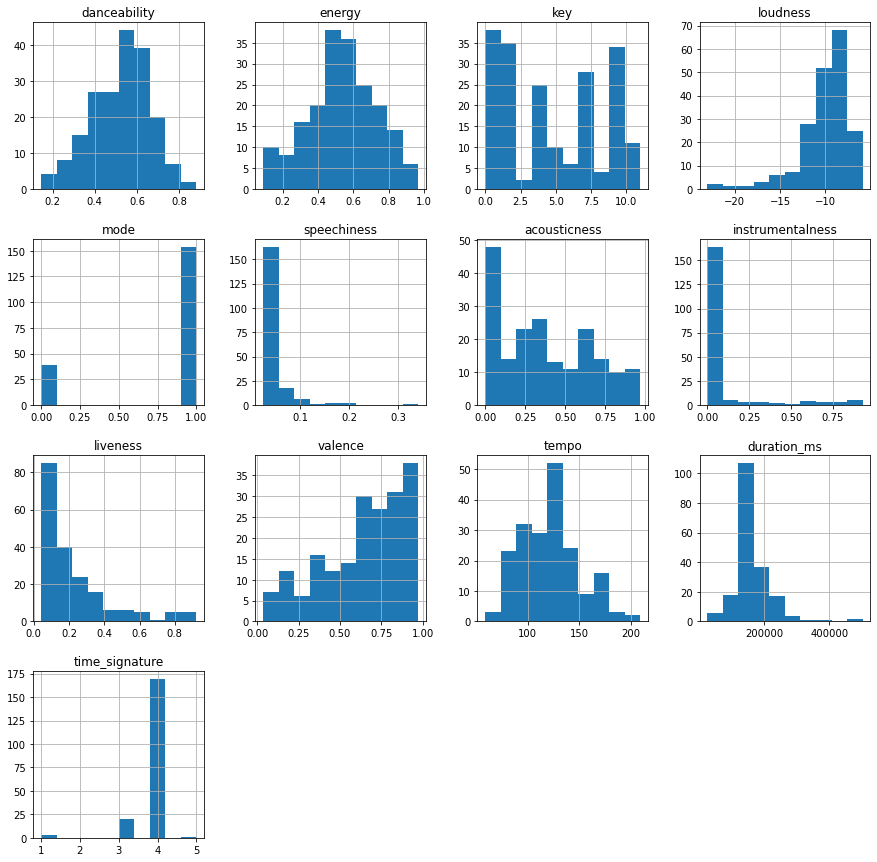

In [142]:
data.hist(figsize=(15,15));

## Preparing the data
The scale of "duration" is much higher than the scale of many other variables! K-Means is a distance based algorithm: we need to scale / normalize

Check out the docs for standardScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Explore other methods for normalizing data: https://scikit-learn.org/stable/modules/preprocessing.html

In [195]:
data_for_cluster = data.drop(['type','id','uri','track_href','analysis_url','song_name','artist'],axis = 1)
# scale your data with the standard scaler
data_prep = StandardScaler().fit_transform(data_for_cluster)

In [196]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#define the model, fit the model to your data 

kmeans = KMeans(n_clusters=8,init = 'k-means++',random_state=40)
y_kmeans = kmeans.fit(data_prep)
y_kmeans

KMeans(random_state=40)

In [197]:
#look at the cluster centres 
y_kmeans.cluster_centers_

array([[ 3.56338535e-01, -1.30677359e+00, -2.31160060e-01,
        -9.41847400e-01,  5.03236280e-01, -2.33376021e-01,
         1.19785143e+00, -2.99193011e-01, -5.15473257e-01,
        -5.03871413e-01, -1.17562287e-01, -2.62226321e-01,
         2.16733650e-01],
       [ 3.86401018e-01,  5.52222705e-01, -7.72449975e-02,
         4.81046764e-01,  5.03236280e-01, -1.63092908e-01,
        -2.29959386e-01, -2.34708718e-01, -2.02945647e-01,
         6.59380423e-01,  9.29897407e-03, -2.41140520e-01,
         2.27383275e-01],
       [ 1.54523469e-01,  5.09917448e-01, -2.67849115e-01,
         3.07137628e-01,  5.03236280e-01,  5.76756303e-01,
        -2.81481557e-01,  3.85802086e-02,  2.36827815e+00,
         1.51566776e-01, -5.76901375e-01, -1.23271449e-01,
         1.73070190e-01],
       [-6.05166394e-01,  1.81890290e-01,  7.82792021e-01,
         2.22415662e-01, -8.55149762e-01,  9.27753239e-01,
        -3.26804854e-01,  4.00279880e-02, -2.28348749e-01,
        -1.20630694e-01,  1.18856336e

In [198]:
# Predicting / assigning the clusters:
clusters=y_kmeans.predict(data_prep)

In [199]:
# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    24
1    82
2    16
3    11
4     1
5    23
6    25
7    11
dtype: int64

In [200]:
# Explore the cluster assignment by placing it in the original dataset
X_cluster=pd.DataFrame(data)
X_cluster['cluster']=clusters
X_cluster.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,type,id,uri,track_href,analysis_url,duration_ms,time_signature,song_name,artist,cluster
0,0.491,0.801,4,-9.835,1,0.0361,0.270,0.000000,0.0665,0.971,...,audio_features,3KiexfmhxHvG5IgAElmTkd,spotify:track:3KiexfmhxHvG5IgAElmTkd,https://api.spotify.com/v1/tracks/3KiexfmhxHvG...,https://api.spotify.com/v1/audio-analysis/3Kie...,173947,4,i saw her standing there,the beatles,1
1,0.591,0.605,0,-10.925,1,0.0413,0.707,0.000000,0.3090,0.882,...,audio_features,40qXGg5nRbcWzcFb26KWkQ,spotify:track:40qXGg5nRbcWzcFb26KWkQ,https://api.spotify.com/v1/tracks/40qXGg5nRbcW...,https://api.spotify.com/v1/audio-analysis/40qX...,108547,4,misery,the beatles,1
2,0.608,0.565,2,-11.060,1,0.0336,0.635,0.000000,0.0601,0.835,...,audio_features,2baEFuU0gQon0hgVRioI1o,spotify:track:2baEFuU0gQon0hgVRioI1o,https://api.spotify.com/v1/tracks/2baEFuU0gQon...,https://api.spotify.com/v1/audio-analysis/2baE...,177133,4,anna (go to him),the beatles,1
3,0.654,0.561,10,-10.551,1,0.0304,0.608,0.000000,0.1290,0.929,...,audio_features,3JQWLa88R35d971o5bIImd,spotify:track:3JQWLa88R35d971o5bIImd,https://api.spotify.com/v1/tracks/3JQWLa88R35d...,https://api.spotify.com/v1/audio-analysis/3JQW...,145080,4,chains,the beatles,1
4,0.402,0.860,4,-10.310,1,0.0504,0.607,0.000000,0.7360,0.822,...,audio_features,7JxGM1R32ZqfwZou3VtnTg,spotify:track:7JxGM1R32ZqfwZou3VtnTg,https://api.spotify.com/v1/tracks/7JxGM1R32Zqf...,https://api.spotify.com/v1/audio-analysis/7JxG...,146440,4,boys,the beatles,2
5,0.605,0.394,4,-11.330,1,0.0378,0.767,0.000000,0.0967,0.597,...,audio_features,7529Z6b1rlGZFFPWjHPeV5,spotify:track:7529Z6b1rlGZFFPWjHPeV5,https://api.spotify.com/v1/tracks/7529Z6b1rlGZ...,https://api.spotify.com/v1/audio-analysis/7529...,146533,4,ask me why,the beatles,0
6,0.527,0.480,4,-9.610,1,0.0280,0.334,0.000000,0.0702,0.706,...,audio_features,6EHuOufBeL6vk3TvVJB5qo,spotify:track:6EHuOufBeL6vk3TvVJB5qo,https://api.spotify.com/v1/tracks/6EHuOufBeL6v...,https://api.spotify.com/v1/audio-analysis/6EHu...,120853,4,please please me,the beatles,1
7,0.520,0.829,0,-6.228,1,0.0806,0.386,0.000062,0.2270,0.744,...,audio_features,3VbGCXWRiouAq8VyMYN2MI,spotify:track:3VbGCXWRiouAq8VyMYN2MI,https://api.spotify.com/v1/tracks/3VbGCXWRiouA...,https://api.spotify.com/v1/audio-analysis/3VbG...,141693,4,love me do,the beatles,1
8,0.635,0.656,2,-8.500,1,0.0291,0.389,0.001270,0.0828,0.770,...,audio_features,7Msq9qojB7yORuJvz49iUy,spotify:track:7Msq9qojB7yORuJvz49iUy,https://api.spotify.com/v1/tracks/7Msq9qojB7yO...,https://api.spotify.com/v1/audio-analysis/7Msq...,124360,4,p.s. i love you,the beatles,1
9,0.608,0.494,4,-12.211,0,0.0345,0.778,0.000000,0.0926,0.879,...,audio_features,2VmB1rF9FtfKUmFHDVnq8Q,spotify:track:2VmB1rF9FtfKUmFHDVnq8Q,https://api.spotify.com/v1/tracks/2VmB1rF9FtfK...,https://api.spotify.com/v1/audio-analysis/2VmB...,160520,4,baby it's you,the beatles,6


In [201]:
# total inertia of all the centroids
kmeans.inertia_

1366.4691116061072

In [202]:
### Third Prototype

In [207]:
def beatle_song():
    beat_song=input("Which song do you really like?")
    if beat_song in top100.song.values:
        print("Oh! It's a Top 100! We recommend you another one from the same link:", random.choice(top100['song']))
    else:
        result = sp.search(beat_song, limit=1)
        result_id = result['tracks']['items'][0]['id'] ## get the id # sp.
        audio_f=sp.audio_features(result_id) #get audio features
        audio_fdf=pd.DataFrame(audio_f)
        audio_fdf2=audio_fdf.drop(['type','id','uri','track_href','analysis_url'],axis = 1)
        scaled = StandardScaler().fit_transform(audio_fdf2)#scale the audio features
        no_clus = kmeans.predict(scaled) #kmeans.predict(scaled) --> cluster_number
    #subset the big datatset to get just the songs from that cluster  df[df["cluster"]==cluster_number]
        df_new = X_cluster[X_cluster['cluster'] == no_clus[0]]
    #get a random song from that subset
        print("So your song is not of the most popular songs of the moment, but don't worry! Here you have one by The Beatles =):", random.choice(df_new['song_name']))
    #print the result! everyone happy
    
    

In [ ]:
beatle_song()